In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
from datetime import datetime, timedelta
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import *

In [2]:
# Choose a location and time.
latitude = [32.2]
longitude = [-110.9] # Tucson, AZ
tz = 'US/Arizona'

a_point = pvlib.location.Location(latitude[0], longitude[0], name='Tucson', tz=tz)
print(a_point)

start = datetime.now() # today's date
end = start + timedelta(days=7) # 7 days from today
timerange = pd.date_range(start, end, tz=tz)

Tucson: latitude=32.2, longitude=-110.9, tz=US/Arizona, altitude=100


In [3]:
fm = GFS()

In [4]:
data = fm.get_query_data(latitude, longitude , timerange, a_point)

In [5]:
time_vals = fm.time.values

In [6]:
var_name = 'temperature'

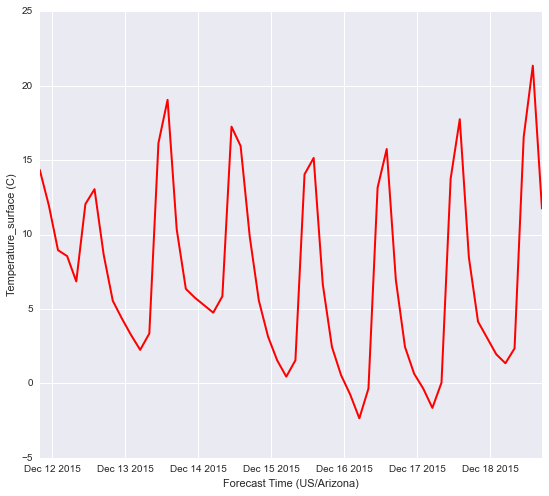

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.plot_date(time_vals, data[var_name], 'r', linewidth=2, tz=tz)
ax.set_ylabel(fm.var_stdnames[var_name] + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time ('+tz+')')

In [8]:
cloud_vars = ['total_clouds','low_clouds','mid_clouds','high_clouds']

In [9]:
total_cloud_cover = data['total_clouds']

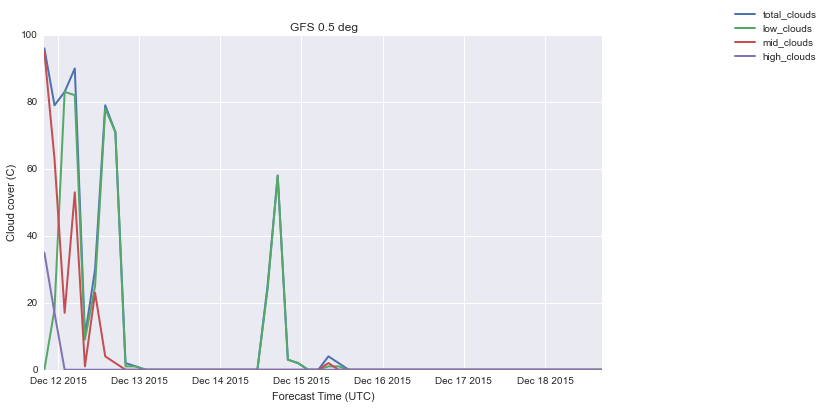

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_ylabel('Cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.set_title('GFS 0.5 deg')
for varname in cloud_vars:
    ax.plot_date(time_vals, data[varname], fmt='-', linewidth=2, label=varname, tz=tz)
ax.legend(bbox_to_anchor=(1.4,1.1))    

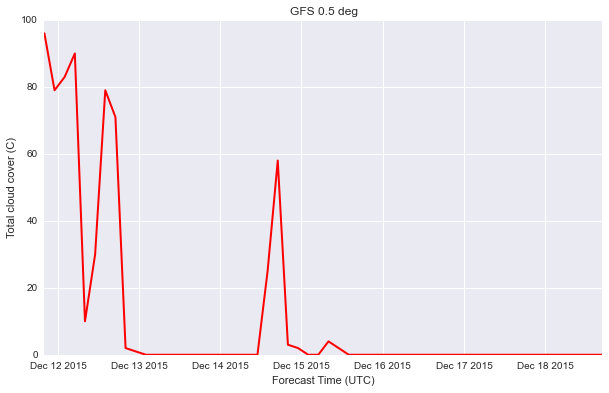

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot_date(time_vals, total_cloud_cover, 'r', linewidth=2, tz=tz)
ax.set_ylabel('Total cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.set_title('GFS 0.5 deg')

In [12]:
fm = GFS(res='quarter')

In [13]:
data = fm.get_query_data(latitude, longitude , timerange, a_point)

In [14]:
time_vals = fm.time

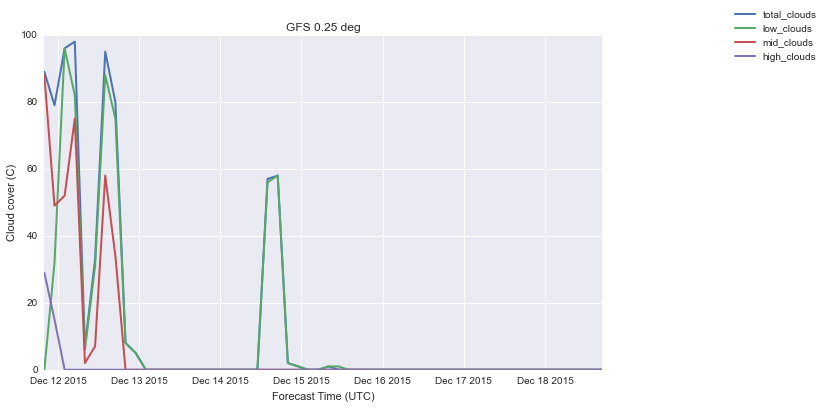

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot_date(time_vals, data[varname], fmt='-', linewidth=2, label=varname, tz=tz)
    
ax.set_ylabel('Cloud cover' + ' (%s)' % fm.var_units[var_name])
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))
ax.set_title('GFS 0.25 deg')

In [16]:
fm = NAM()

In [17]:
data = fm.get_query_data(latitude, longitude, timerange, a_point)

In [18]:
time_vals = fm.time

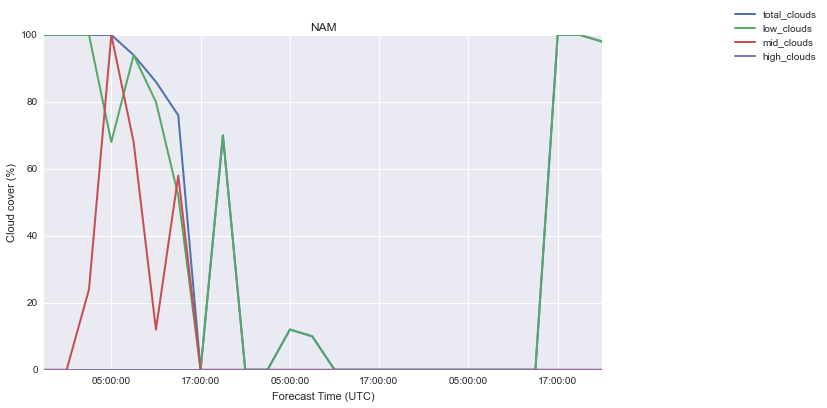

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot_date(time_vals, data[varname], fmt='-', linewidth=2, label=varname, tz=tz)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))
ax.set_title('NAM')

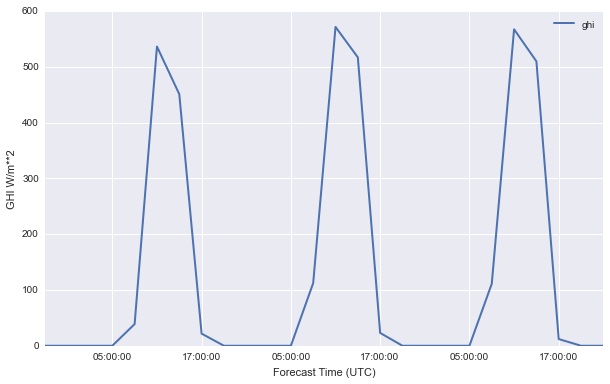

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot_date(time_vals, data['ghi'], linewidth=2, fmt='-', label='ghi', tz=tz)
ax.set_ylabel('GHI W/m**2')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend()

In [22]:
fm = NDFD()

In [23]:
data = fm.get_query_data(latitude, longitude, timerange, a_point)

In [24]:
time_vals = fm.time

In [25]:
total_cloud_cover = data['total_clouds']
temp = data['temperature']
wind = data['wind_speed']

(0, 100)

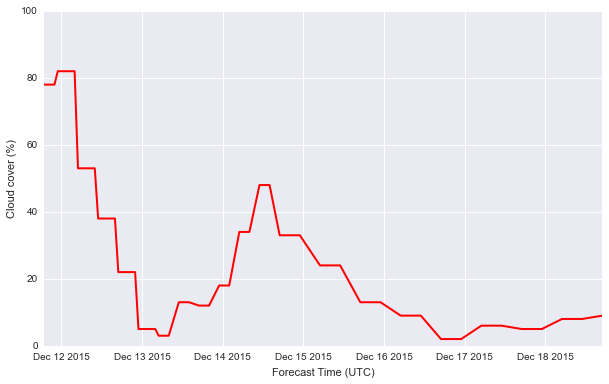

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot_date(time_vals, total_cloud_cover, 'r', linewidth=2, tz=tz)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
plt.ylim(0,100)

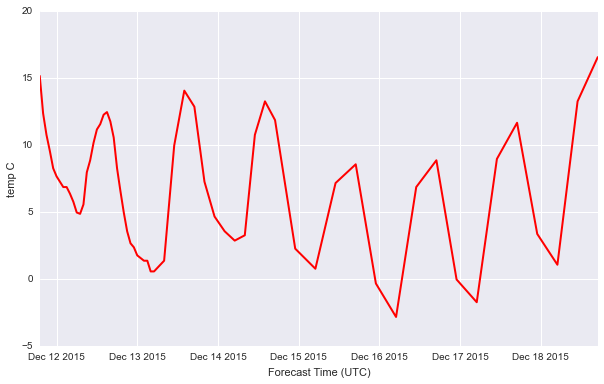

In [27]:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot_date(time_vals, temp, 'r', linewidth=2, tz=tz)
    ax.set_ylabel('temp {}'.format(fm.var_units['temperature']))
    ax.set_xlabel('Forecast Time (UTC)')

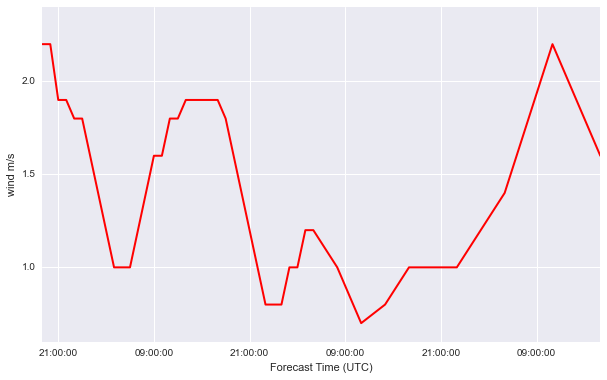

In [28]:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot_date(time_vals, wind, 'r', linewidth=2, tz=tz)
    ax.set_ylabel('wind {}'.format(fm.var_units['wind_speed']))
    ax.set_xlabel('Forecast Time (UTC)')

In [29]:
fm = RAP()

In [30]:
data = fm.get_query_data(latitude, longitude, timerange, a_point)

In [31]:
time_vals = fm.time

In [32]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

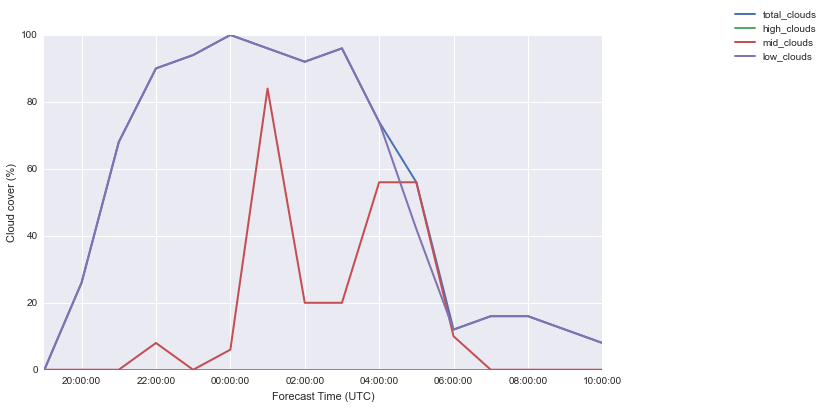

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot_date(time_vals, data[varname][:].squeeze(), fmt='-', linewidth=2, label=varname, tz=tz)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))

In [34]:
fm = HRRR_ESRL()

c:\derek\programmingfolder\repositories\pvlib\pvlib\forecast.py:520: UserWarning: HRRR_ESRL is an experimental model and is not always                          available.
  available.')
C:\Users\Derek.Groenendyk\Anaconda3\envs\pvlibdev\lib\site-packages\siphon\catalog.py:61: UserWarning: URL http://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/HRRR/CONUS_3km/surface/catalog.xml returned HTML. Changing to: http://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/HRRR/CONUS_3km/surface/catalog.xml
  new_url))


ParseError: mismatched tag: line 16, column 4 (<string>)

In [100]:
data = fm.get_query_data(latitude, longitude, timerange, a_point)

In [101]:
time_vals = fm.time

In [102]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot_date(time_vals, data[varname], linewidth=2, label=varname, tz=tz)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))

ValueError: ordinal must be >= 1

KeyError: 'ghi'

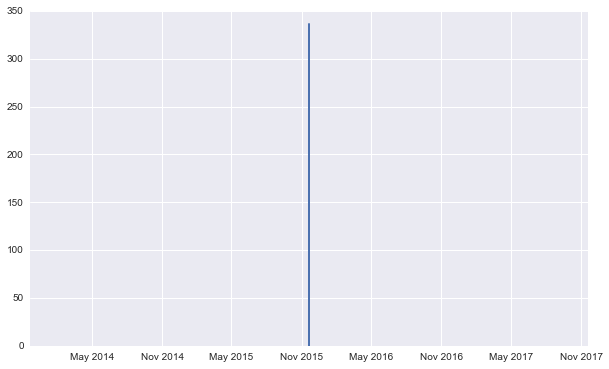

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot_date(time_vals, data['ghi'], linewidth=2, tz=tz)
ax.set_ylabel('GHI' + ' (%s)' % fm.var_units['ghi'])
ax.set_xlabel('Forecast Time (UTC)')

In [35]:
fm = HRRR()

In [36]:
data = fm.get_query_data(latitude, longitude, timerange, a_point)

In [37]:
time_vals = fm.time

In [38]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

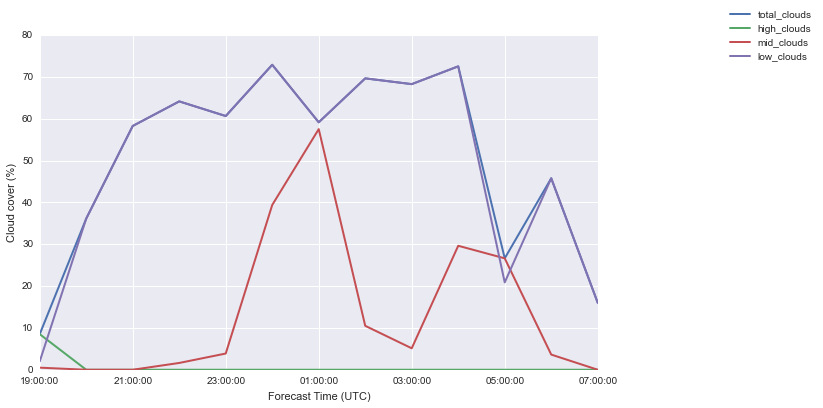

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for varname in cloud_vars:
    ax.plot_date(time_vals, data[varname][:].squeeze(), fmt='-', linewidth=2, label=varname, tz=tz)
ax.set_ylabel('Cloud cover (%)')
ax.set_xlabel('Forecast Time (UTC)')
ax.legend(bbox_to_anchor=(1.4,1.1))